In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
import math

In [2]:
data = pd.read_csv('fitzpatrick17k.csv')

In [3]:
data.head()

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum
0,000491af8dd4d739de520e8a68be7134,2,1,disseminated actinic porokeratosis,benign epidermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicddisse...
1,0009d89a58dac26bb3c113744b7b4196,3,2,squamous cell carcinoma,malignant epidermal,malignant,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicbbowen...
2,000b6317b3be6d504e212a50e4d5667f,3,1,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
3,000e8dd5ee75dd6668e978e7a4e6fe54,5,5,folliculitis,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=6185,httpwwwatlasdermatologicocombrimgimageId6185.jpg
4,0012821d6f11b96cf33f2c2ee5c68d1f,3,2,syringoma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicssyrin...


In [4]:
data

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum
0,000491af8dd4d739de520e8a68be7134,2,1,disseminated actinic porokeratosis,benign epidermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicddisse...
1,0009d89a58dac26bb3c113744b7b4196,3,2,squamous cell carcinoma,malignant epidermal,malignant,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicbbowen...
2,000b6317b3be6d504e212a50e4d5667f,3,1,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...
3,000e8dd5ee75dd6668e978e7a4e6fe54,5,5,folliculitis,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=6185,httpwwwatlasdermatologicocombrimgimageId6185.jpg
4,0012821d6f11b96cf33f2c2ee5c68d1f,3,2,syringoma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicssyrin...
...,...,...,...,...,...,...,...,...,...
16572,ffece33de2058fcc5027d70e699391bc,2,1,urticaria,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppapul...
16573,fff56febadeacf46b326b2543da5cafa,4,4,photodermatoses,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=5435,httpwwwatlasdermatologicocombrimgimageId5435.jpg
16574,fff739b6e0d5e78da4576a0fd9943bdf,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppolym...
16575,fffce1f2b2f2dc9fd0b96d9099629d93,3,4,fixed eruptions,inflammatory,non-neoplastic,NaN,http://atlasdermatologico.com.br/img?imageId=2099,httpwwwatlasdermatologicocombrimgimageId2099.jpg


In [5]:
data['label'].value_counts()

psoriasis                      653
squamous cell carcinoma        581
lichen planus                  491
basal cell carcinoma           468
allergic contact dermatitis    430
                              ... 
paronychia                      59
erythema elevatum diutinum      55
xanthomas                       53
pilomatricoma                   53
pustular psoriasis              53
Name: label, Length: 114, dtype: int64

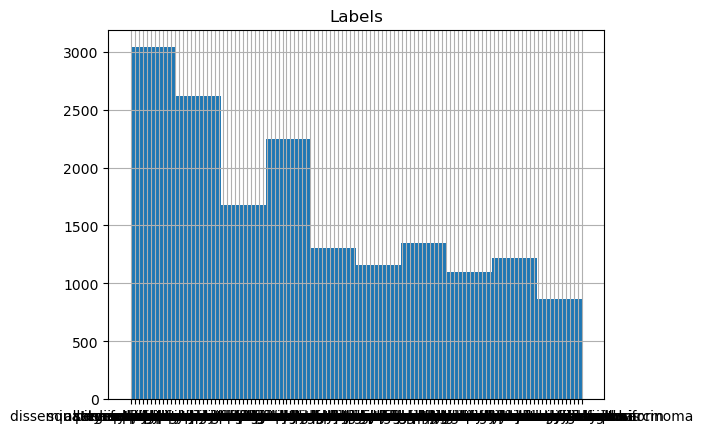

<Figure size 1000x900 with 0 Axes>

In [6]:
data['label'].hist()
plt.title('Labels')
plt.figure(figsize=(10,9))
plt.show()

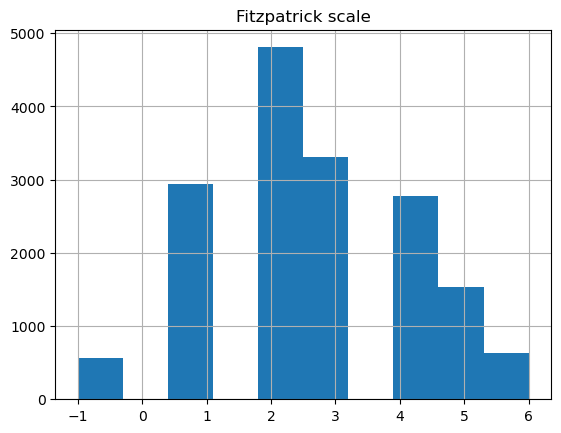

<Figure size 1000x900 with 0 Axes>

In [7]:
data['fitzpatrick_scale'].hist()
plt.title('Fitzpatrick scale')
plt.figure(figsize=(10,9))
plt.show()

In [8]:
data['fitzpatrick_scale'].value_counts()

 2    4808
 3    3308
 1    2947
 4    2781
 5    1533
 6     635
-1     565
Name: fitzpatrick_scale, dtype: int64

In [9]:
data.drop(data[data['fitzpatrick_scale']==-1].index,axis=0,inplace=True)

In [10]:
data['fitzpatrick_scale'].value_counts()

2    4808
3    3308
1    2947
4    2781
5    1533
6     635
Name: fitzpatrick_scale, dtype: int64

[Text(0.5, 1.0, 'Class')]

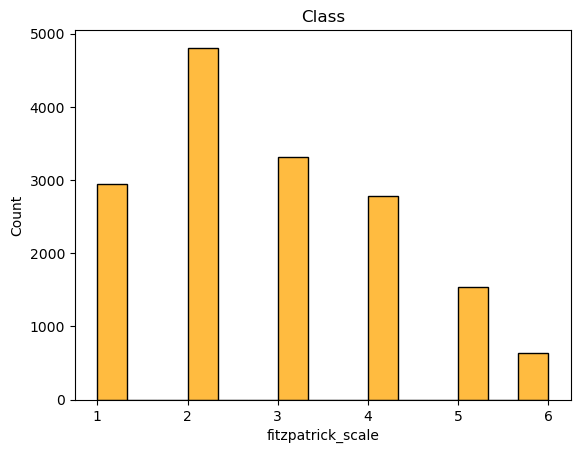

In [11]:
sns.histplot(data['fitzpatrick_scale'],bins=15,color='orange').set(title=('Class'))

# Making function to move images into classes

In [9]:
import os

In [12]:
scale1 = list(data[data['fitzpatrick_scale']==1]['md5hash'])
targetLabels=['fpScale1','fpScale2','fpScale3','fpScale4','fpScale5','fpScale6']
daLabels =[]
for i,name in enumerate(targetLabels):
    print(i,name)
    name = list(data[data['fitzpatrick_scale']==i+1]['md5hash'])
    daLabels.append(name)
    
for i in daLabels:
    print(len(i))

0 fpScale1
1 fpScale2
2 fpScale3
3 fpScale4
4 fpScale5
5 fpScale6
2947
4808
3308
2781
1533
635


In [11]:
dataset =[['train',
           [['fpScale1',[]],
            ['fpScale2',[]],
            ['fpScale3',[]],
            ['fpScale4',[]],
            ['fpScale5',[]],
            ['fpScale6',[]]]],
          ['validate',
           [['fpScale1',[]],
            ['fpScale2',[]],
            ['fpScale3',[]],
            ['fpScale4',[]],
            ['fpScale5',[]],
            ['fpScale6',[]]]],
          ['test',
           [['fpScale1',[]],
            ['fpScale2',[]],
            ['fpScale3',[]],
            ['fpScale4',[]],
            ['fpScale5',[]],
            ['fpScale6',[]]]
          ]]

In [143]:
#dataset[0][1].append(20)
#dataset[2][1][5][1].append([20,30,40])
#dataset[1][1][4][1].append([20,30,40])
#dataset

In [15]:
for i,items in enumerate(daLabels):
    # Sets the random seed 
    random.seed(101)
    
    imageList=list(items)
    # Shuffle the list of image filenames
    random.shuffle(imageList)

    # determine the number of images for each set
    trainSize = math.ceil(len(imageList) * 0.80*0.80)
    valSize = int(len(imageList) * 0.80*0.20)
    testSize = int(len(imageList) * 0.2)
    
    trainImages = imageList[0:trainSize]
    valImages = imageList[trainSize:(trainSize+valSize)]
    testImages = imageList[(trainSize+valSize):]
    
    for j,labels in enumerate([trainImages,valImages,testImages]):
        dataset[j][1][i][1].append(labels)
    
    print(len(items))
    print(targetLabels[i]+' trainSize: ', trainSize) 
    print(targetLabels[i]+' valSize: ', valSize)
    print(targetLabels[i]+' testSize: ', testSize)   
    print('')
#     print(imageList[0:trainSize])
#     print(len(imageList[0:trainSize]))
#     print(imageList[trainSize:(trainSize+valSize)])
#     print(len(imageList[trainSize:(trainSize+valSize)]))  
#     print(imageList[(trainSize+valSize):])
#     print(len(imageList[(trainSize+valSize):]))
    #check = trainImages+valImages+testImages
    #print('AAAAA')
    #print(len(check))
    #print(check)
    
    
    #print(imageList == check)

2947
fpScale1 trainSize:  1887
fpScale1 valSize:  471
fpScale1 testSize:  589

4808
fpScale2 trainSize:  3078
fpScale2 valSize:  769
fpScale2 testSize:  961

3308
fpScale3 trainSize:  2118
fpScale3 valSize:  529
fpScale3 testSize:  661

2781
fpScale4 trainSize:  1780
fpScale4 valSize:  444
fpScale4 testSize:  556

1533
fpScale5 trainSize:  982
fpScale5 valSize:  245
fpScale5 testSize:  306

635
fpScale6 trainSize:  407
fpScale6 valSize:  101
fpScale6 testSize:  127



In [16]:
#checking for uniqueness
for i,a in enumerate(daLabels):
    ch=dataset[0][1][i][1][0]+dataset[1][1][i][1][0]+dataset[2][1][i][1][0]
    print(set(daLabels[i])==set(ch))

True
True
True
True
True
True


In [17]:
import shutil, os

In [21]:
#split images into classes
def copyImages(parentFolder,dataset,targetLabel,data):
    '''
    move images from parent folder to dataset to target label folder
    E.G data/a.jpg to data/data/train/fp1/a.jpg
    '''
    
    # Get the appropriate labels
    print(f"\nUsing {dataset} labels...")

    # Make target directory
    os.makedirs(parentFolder + "/data/fitzPatrick/" + dataset + "/" + targetLabel, 
                exist_ok=True)

    # Go through labels and get appropriate classes
    images_moved = [] # Keep track of images moved
    for j in data:
        # Create original image path and new path
        og_path = parentFolder + "/finalfitz17k/" + j + ".jpg"
        new_path = parentFolder + "/data/fitzPatrick/"  + dataset + "/" +targetLabel+'/'+ j + ".jpg"

        # Copy images from old path to new path, Uncomment this to allow copying
        shutil.copy2(og_path, new_path)
        images_moved.append(new_path)
    print(f"Copied {len(images_moved)} images from {dataset} dataset {targetLabel} class...")
                   
            


In [22]:
targetLabels=['fpScale1','fpScale2','fpScale3','fpScale4','fpScale5','fpScale6']
datasets=['train','val','test']
parentFolder = 'data'

for i,na in enumerate(datasets):
    for j,name in enumerate(targetLabels):
        #print(len(dataset[i][1][j][1][0]))
        copyImages(parentFolder=parentFolder,
                   dataset=na,
                   data=dataset[i][1][j][1][0],
                   targetLabel=name)


Using train labels...
Copied 1887 images from train dataset fpScale1 class...

Using train labels...
Copied 3078 images from train dataset fpScale2 class...

Using train labels...
Copied 2118 images from train dataset fpScale3 class...

Using train labels...
Copied 1780 images from train dataset fpScale4 class...

Using train labels...
Copied 982 images from train dataset fpScale5 class...

Using train labels...
Copied 407 images from train dataset fpScale6 class...

Using val labels...
Copied 471 images from val dataset fpScale1 class...

Using val labels...
Copied 769 images from val dataset fpScale2 class...

Using val labels...
Copied 529 images from val dataset fpScale3 class...

Using val labels...
Copied 444 images from val dataset fpScale4 class...

Using val labels...
Copied 245 images from val dataset fpScale5 class...

Using val labels...
Copied 101 images from val dataset fpScale6 class...

Using test labels...
Copied 589 images from test dataset fpScale1 class...

Using t

In [342]:
os.getcwd()

'D:\\python\\pyForDataScience\\skinCancer\\dataPreprocessing'